In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("data.csv")

In [3]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [4]:
strings = list(df.dtypes[df.dtypes == 'object'].index)
strings

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [5]:
for col in strings:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [6]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

# 2.3 Exploratory Data Analysis

In [7]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

year
[2011 2012 2013 1992 1993]
28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

engine_hp
[335. 300. 230. 320. 172.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16

highway_mpg
[26 28 27 25 24]
59

city_mpg
[19 20 18 17 16]
69

popularity
[3916 3105  819  617 1013]
48

msrp
[46135 40650 36350 29450 345

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<AxesSubplot:xlabel='msrp', ylabel='Count'>

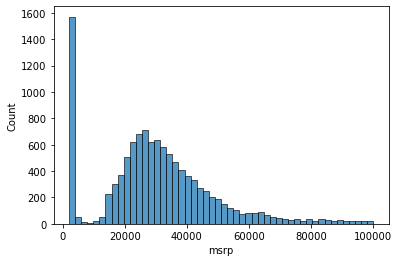

In [9]:
sns.histplot(df.msrp[df["msrp"] < 100000], bins=50)

In [10]:
# the logarithm of 0 gives error so
# inorder to remove zero from logarithm we add 1
np.log([0+1, 1+1, 10+1, 1000+1, 100000+1])

array([ 0.        ,  0.69314718,  2.39789527,  6.90875478, 11.51293546])

In [11]:
np.log1p([0, 1, 10, 1000, 10000])

array([0.        , 0.69314718, 2.39789527, 6.90875478, 9.21044037])

<AxesSubplot:xlabel='msrp', ylabel='Count'>

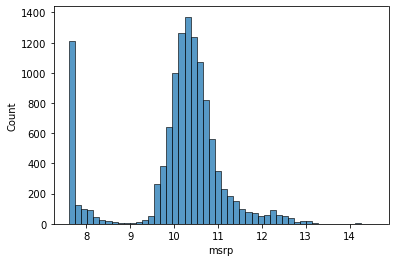

In [12]:
price_logs = np.log1p(df.msrp)
sns.histplot(price_logs, bins=50)

### Missing Values

In [13]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

# 2.4 Setting up the validation framework

In [14]:
n = len(df)

n_val = int(len(df) * 0.2)
n_test = int(len(df) * 0.2)
n_train = n - n_val - n_test

In [15]:
n_val, n_test, n_train

(2382, 2382, 7150)

In [16]:
df_train = df.iloc[n_train]
df_val = df.iloc[n_train:n_train+n_val]
df_test = df.iloc[n_train+n_val:]

In [17]:
idx = np.arange(n)

In [18]:
np.random.seed(2)
np.random.shuffle(idx)

In [19]:
idx[n_train:]

array([2779, 3708, 4794, ..., 6637, 2575, 7336])

In [20]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [21]:
len(df_train), len(df_val), len(df_test)

(7150, 2382, 2382)

In [22]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [23]:
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

In [24]:
del df_train["msrp"]
del df_val["msrp"]
del df_test["msrp"]

In [25]:
len(y_train)

7150

# Linear regression vector form

In [26]:
def dot(xi, w):
    n = len(xi)
    
    res = 0.0
    
    for j in range(n):
        res = res + xi[j] * w[j]
        
    return res

In [27]:
def linear_regression(xi):
    return b + dot(xi, w)

In [28]:
b = 7.17
w = [0.01, 0.04, 0.002]
w_new = [b] + w

In [29]:
x1 = [1, 148, 35, 1385]
x2 = [1, 132, 25, 2031]
x10 = [1, 453, 11, 86]

X = [x1, x2, x10]
X = np.array(X)
X

array([[   1,  148,   35, 1385],
       [   1,  132,   25, 2031],
       [   1,  453,   11,   86]])

In [30]:
w_new

[7.17, 0.01, 0.04, 0.002]

In [31]:
def linear_regression(X):
    return X.dot(w_new)

In [32]:
linear_regression(X)

array([12.82 , 13.552, 12.312])

# Training a linear regression model

In [33]:
def train_linear_regression(X, y):
    pass

In [34]:
X = [
    [148, 35, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [145, 33, 489],
    [39, 56, 123]
]

X = np.array(X)
X

array([[ 148,   35, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 145,   33,  489],
       [  39,   56,  123]])

In [35]:
ones = np.ones(X.shape[0])
ones

array([1., 1., 1., 1., 1.])

In [36]:
X = np.column_stack([ones, X])

In [37]:
y = [100, 200, 150 ,250, 190]

In [38]:
XTX = X.T.dot(X)

In [39]:
XTX_inv = np.linalg.inv(XTX)

In [40]:
w_full = XTX_inv.dot(X.T).dot(y)

In [41]:
b = w_full[0]
w = w_full[1: ]

In [42]:
b, w

(937.9034879380822, array([ -1.42768757, -12.29905486,  -0.12700028]))

In [43]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [44]:
train_linear_regression(X, y)

(2.9644689212584735e+18,
 array([-2.96446892e+18,  1.41591718e+00, -2.01030419e-17, -1.65564285e-02]))

# Car price baseline model

In [45]:
df_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

In [46]:
base = ['engine_hp','engine_cylinders','highway_mpg',
       'city_mpg', 'popularity']

In [47]:
X_train = df_train[base].values

In [48]:
X_train = df_train[base].fillna(0).values

In [49]:
b, w = train_linear_regression(X_train, y_train)

In [50]:
y_pred = b + X_train.dot(w)

<AxesSubplot:ylabel='Count'>

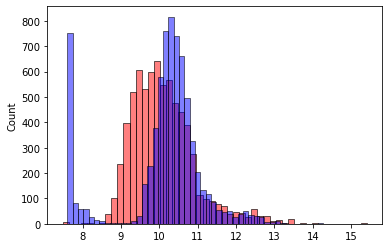

In [51]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

# RMSE

In [52]:
def rmse(y, y_pred):
    m = len(y)
    se = np.sum((y_pred - y) ** 2)
    mse = se / m
    return np.sqrt(mse)

In [53]:
rmse(y_train, y_pred)

0.7554192603920132

# Validation the model

In [63]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [64]:
X_train = prepare_X(df_train)
b, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = b + X_val.dot(w)

rmse(y_val, y_pred)

0.7616530991301594

# Simple feature engineering

In [65]:
df_train.year.max()

2017

In [66]:
2017 - df_train.year

0        9
1        5
2        1
3       26
4        0
        ..
7145     2
7146     2
7147     2
7148     3
7149     0
Name: year, Length: 7150, dtype: int64

In [67]:
def prepare_X(df):
    df = df.copy()
    
    df['age'] = 2017 - df.year
    features = base + ['age']
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [68]:
X_train = prepare_X(df_train)

In [69]:
X_train = prepare_X(df_train)
b, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = b + X_val.dot(w)

rmse(y_val, y_pred)

0.5172055461058324

<AxesSubplot:ylabel='Count'>

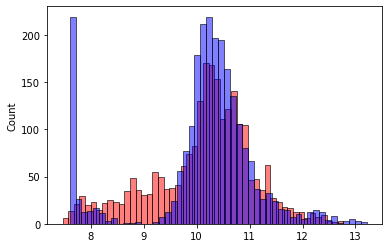

In [70]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_val, color='blue', alpha=0.5, bins=50)

# Categorical Variables

In [71]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()
    
    df['age'] = 2017 - df.year
    features.append('age')
    
    for v in [2, 3, 4]:
        df["num_doors_%s" % v] = (df.number_of_doors == v).astype('int')
        features.append('num_doors_%s' % v)
        
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [72]:
prepare_X(df_train)

array([[148.,   4.,  33., ...,   1.,   0.,   0.],
       [132.,   4.,  32., ...,   0.,   0.,   1.],
       [148.,   4.,  37., ...,   0.,   0.,   1.],
       ...,
       [285.,   6.,  22., ...,   0.,   0.,   1.],
       [563.,  12.,  21., ...,   0.,   0.,   1.],
       [200.,   4.,  31., ...,   0.,   0.,   1.]])

In [73]:
X_train = prepare_X(df_train)
b, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = b + X_val.dot(w)

rmse(y_val, y_pred)

0.5157995641503085

In [74]:
makes = list(df.make.value_counts().head().index)
makes

['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']

In [75]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()
    
    df['age'] = 2017 - df.year
    features.append('age')
    
    for v in [2, 3, 4]:
        df["num_doors_%s" % v] = (df.number_of_doors == v).astype('int')
        features.append('num_doors_%s' % v)

    for v in makes:
        df["make_%s" % v] = (df.make == v).astype('int')
        features.append('make_%s' % v)
        
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [76]:
X_train = prepare_X(df_train)
b, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = b + X_val.dot(w)

rmse(y_val, y_pred)

0.507603884955567

In [77]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [78]:
categorical_variables = [
    'make', 'engine_fuel_type', 'transmission_type', 
   'driven_wheels', 'market_category', 'vehicle_size', 
    'vehicle_style'
]

In [79]:
categories = {}

for c in categorical_variables:
    categories[c] = list(df[c].value_counts().head().index) 

In [80]:
categories

{'make': ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge'],
 'engine_fuel_type': ['regular_unleaded',
  'premium_unleaded_(required)',
  'premium_unleaded_(recommended)',
  'flex-fuel_(unleaded/e85)',
  'diesel'],
 'transmission_type': ['automatic',
  'manual',
  'automated_manual',
  'direct_drive',
  'unknown'],
 'driven_wheels': ['front_wheel_drive',
  'rear_wheel_drive',
  'all_wheel_drive',
  'four_wheel_drive'],
 'market_category': ['crossover',
  'flex_fuel',
  'luxury',
  'luxury,performance',
  'hatchback'],
 'vehicle_size': ['compact', 'midsize', 'large'],
 'vehicle_style': ['sedan',
  '4dr_suv',
  'coupe',
  'convertible',
  '4dr_hatchback']}

In [81]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()
    
    df['age'] = 2017 - df.year
    features.append('age')
    
    for v in [2, 3, 4]:
        df["num_doors_%s" % v] = (df.number_of_doors == v).astype('int')
        features.append('num_doors_%s' % v)

    for c, values in categories.items():
        for v in values:
            df['%s_%s' %(c, v)] = (df[c] == v).astype('int')
            features.append('%s_%s' %(c, v))
        
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [82]:
X_train = prepare_X(df_train)
b, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = b + X_val.dot(w)

rmse(y_val, y_pred)

52.08765237410741

# Regularization

In [83]:
def train_linear_regression_reg(X, y, r=0.01):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [84]:
X_train = prepare_X(df_train)
b, w = train_linear_regression_reg(X_train, y_train, r=0.01)

X_val = prepare_X(df_val)
y_pred = b + X_val.dot(w)

rmse(y_val, y_pred)

0.4565219901186571

<AxesSubplot:ylabel='Count'>

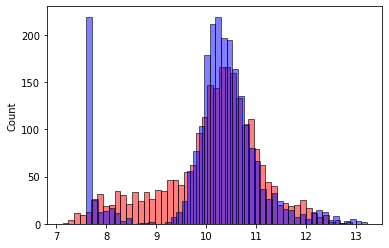

In [85]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_val, color='blue', alpha=0.5, bins=50)

# Tuning the model

In [86]:
for r in [0.0, 0.000001, 0.0001, 0.001, 0.1, 1, 100]:
    X_train = prepare_X(df_train)
    b, w = train_linear_regression_reg(X_train, y_train, r=r)

    X_val = prepare_X(df_val)
    y_pred = b + X_val.dot(w)
    score =  rmse(y_val, y_pred)
    
    print(b, score)

-4549127492855609.0 52.08765237410741
-42.00321368843751 0.45651703503528535
6.254240878313915 0.45651706457624014
6.285613424445728 0.4565175086094597
6.191208642500289 0.45656927630377886
5.634896668260641 0.4572204317996042
2.499047083003775 0.5786709462475825


# Using the model

In [87]:
df_full_train = pd.concat([df_train, df_val]).reset_index(drop=True)

In [91]:
X_full_train = prepare_X(df_full_train)

In [92]:
X_full_train

array([[148.,   4.,  33., ...,   1.,   0.,   0.],
       [132.,   4.,  32., ...,   0.,   0.,   1.],
       [148.,   4.,  37., ...,   0.,   0.,   1.],
       ...,
       [332.,   8.,  23., ...,   0.,   0.,   0.],
       [148.,   4.,  34., ...,   0.,   0.,   0.],
       [290.,   6.,  25., ...,   0.,   0.,   0.]])

In [100]:
y_full_train = np.concatenate([y_train, y_val]) 

In [102]:
b , w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)

In [105]:
X_test = prepare_X(df_test)
y_pred = b + X_test.dot(w)
score =  rmse(y_test, y_pred)
score

0.4517749309383914

In [107]:
car = df_test.iloc[15].to_dict()
car

{'make': 'honda',
 'model': 's2000',
 'year': 2008,
 'engine_fuel_type': 'premium_unleaded_(required)',
 'engine_hp': 237.0,
 'engine_cylinders': 4.0,
 'transmission_type': 'manual',
 'driven_wheels': 'rear_wheel_drive',
 'number_of_doors': 2.0,
 'market_category': 'factory_tuner,high-performance',
 'vehicle_size': 'compact',
 'vehicle_style': 'convertible',
 'highway_mpg': 25,
 'city_mpg': 18,
 'popularity': 2202}

In [108]:
df_small = pd.DataFrame([car])
df_small

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,honda,s2000,2008,premium_unleaded_(required),237.0,4.0,manual,rear_wheel_drive,2.0,"factory_tuner,high-performance",compact,convertible,25,18,2202


In [110]:
X_small = prepare_X(df_small)

In [111]:
y_pred = b + X_small.dot(w)
y_pred

array([10.17294244])

In [112]:
np.expm1(y_pred)

array([26184.01130335])

In [114]:
np.expm1(y_test[15])

36299.99999999999